In [2]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.onequbit, qtm.custom_gate

In [8]:
num_qubits = 3
num_layers = 1
thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)
theta = np.random.uniform(0, 2*np.pi)

In [3]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 100/100 [13:07<00:00,  7.87s/it]


In [4]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 100/100 [10:32<00:00,  6.33s/it]


In [ ]:
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
import qtm.fubini_study
loss_values_qng = []
thetass_w = []
print('W')
for i in range(0, 100):
    print(i)
    G = qtm.fubini_study.calculate_linear_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchecker_linear,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)

    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.nqubit.create_Wchecker_linear(qc.copy(), thetas, num_layers, theta)
    
    loss = qtm.base.loss_basis(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_qng.append(loss)
    thetass_w.append(thetas)

In [6]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_qng_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_basis,
    optimizer = qtm.base.qng_adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)

Step: 100%|██████████| 100/100 [09:51<00:00,  5.91s/it]


In [13]:
path = "../../experiments/compare_optimizer/Wchecker_3qubit/"

In [17]:
import pandas as pd
loss_values_sgd = pd.read_csv(path + "/loss_values_sgd.csv", sep=",", header=None)
# loss_values_sgd = loss_values_sgd.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
loss_values_adam = pd.read_csv(path + "/loss_values_adam.csv", sep=",", header=None)
# loss_values_adam = loss_values_adam.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

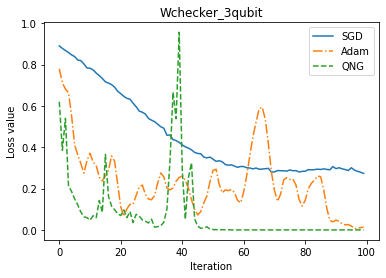

In [19]:
# Plot loss value in 100 steps
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.title('Wchecker_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Wchecker_3qubit.png', format='png', dpi=600)
plt.show() 